<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/R-progrmming/blob/main/Healthcare_Data_Manipulation_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Original Dataset:
   PatientID Age Gender Treatment Survival_Time   Status
1          1  46   Male     DrugA           334    Alive
2          2  73 Female     DrugB           276 Deceased
3          3  52   Male     DrugB           372 Deceased
4          4  79   Male     DrugA           370    Alive
5          5  NA   Male     DrugA           366 Deceased
6          6  33   Male     DrugA           355 Deceased
7          7  59 Female     DrugA           344    Alive
8          8  79 Female     DrugB            NA    Alive
9          9  60   Male     DrugA           276    Alive
10        10  55 Female     DrugA           270 Deceased
11        11  83   Male     DrugB           244 Deceased
12        12  NA Female     DrugA           283 Deceased
13        13  67   Male     DrugA           199 Deceased
14        14  61 Female     DrugA           474    Alive
15        15  36 Female     DrugA           397    Alive
16        16  79   Male     DrugB           210 Deceased
17        17 

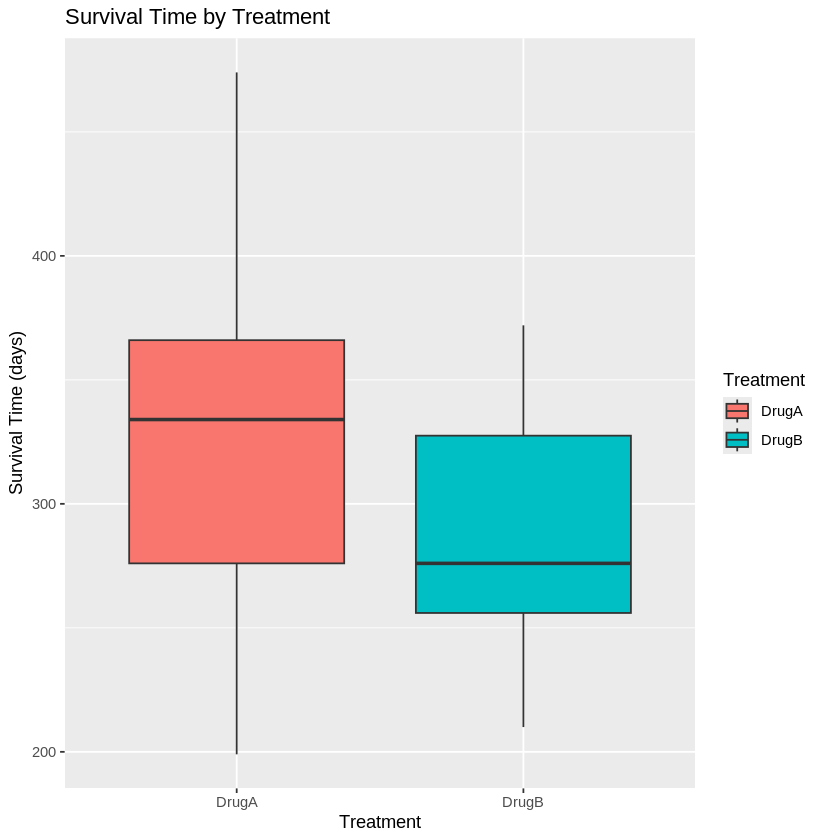

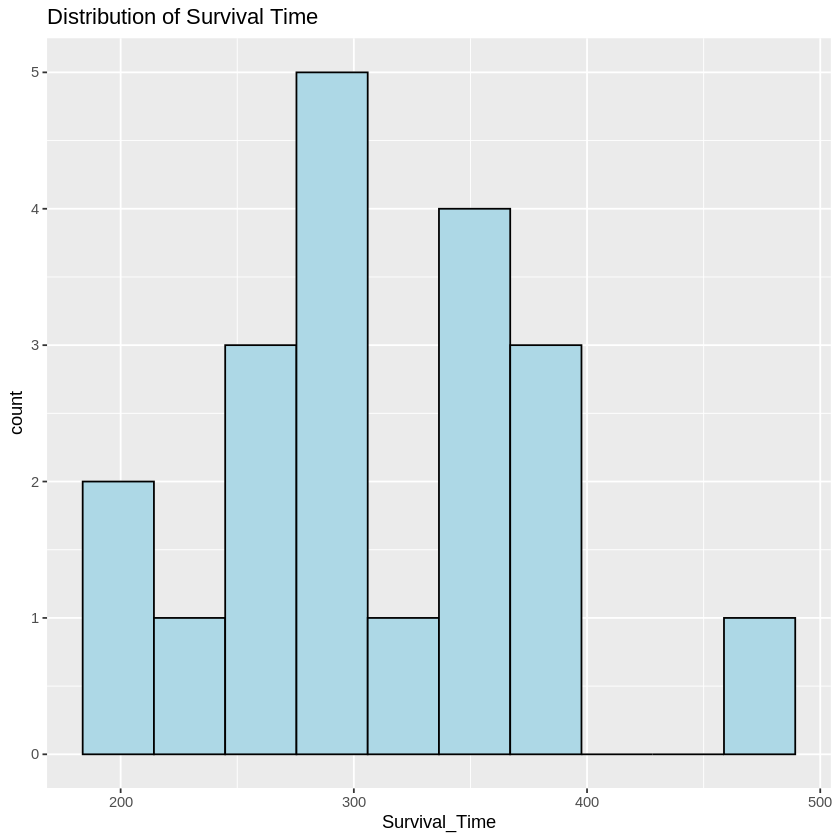


Linear Regression Summary:

Call:
lm(formula = Survival_Time ~ Age, data = patient_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-103.461  -40.234    5.176   38.586  163.722 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 389.7592    56.9593   6.843  2.1e-06 ***
Age          -1.3030     0.9271  -1.405    0.177    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66.09 on 18 degrees of freedom
Multiple R-squared:  0.09888,	Adjusted R-squared:  0.04882 
F-statistic: 1.975 on 1 and 18 DF,  p-value: 0.1769



`geom_smooth()` using formula = 'y ~ x'


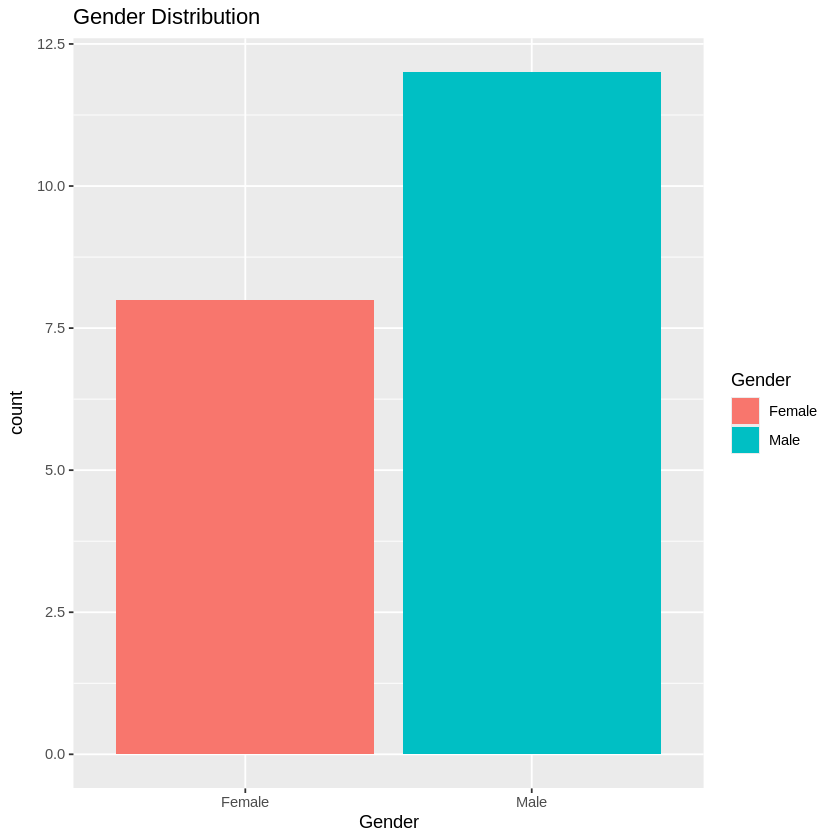

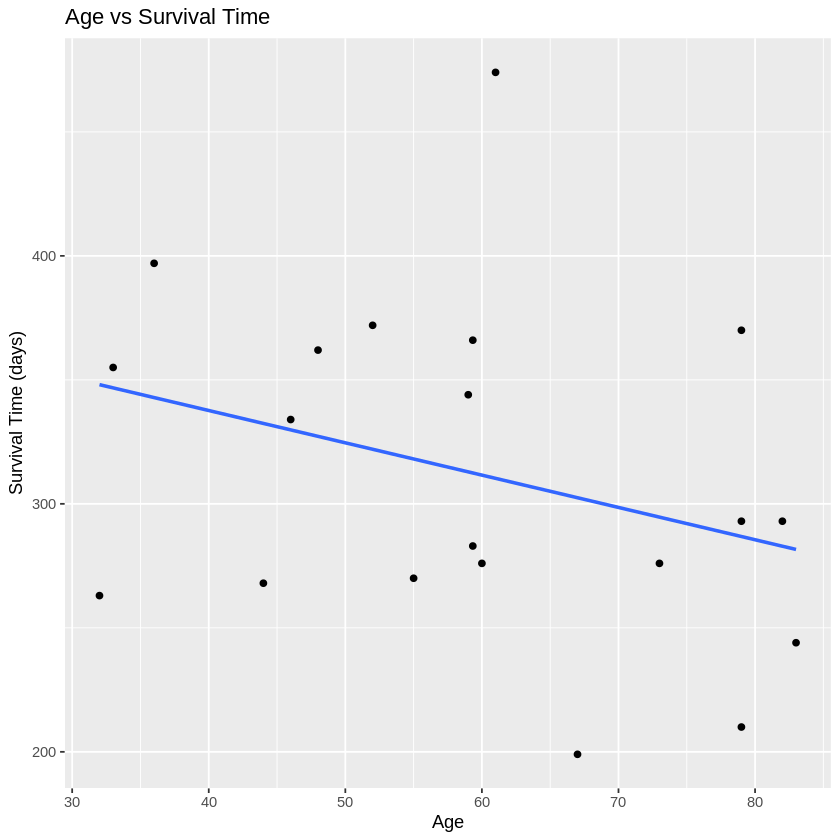

In [1]:
# -------------------------------------------
# Healthcare Data Manipulation & Visualization
# -------------------------------------------

install.packages("dplyr")
install.packages("ggplot2")

library(dplyr)
library(ggplot2)

# -------------------------
# 1. CREATE HEALTHCARE DATA
# -------------------------

set.seed(123)

patient_data <- data.frame(
  PatientID = 1:20,
  Age = round(runif(20, 30, 85)),                        # random ages 30–85
  Gender = sample(c("Male", "Female"), 20, replace = TRUE),
  Treatment = sample(c("DrugA", "DrugB"), 20, replace = TRUE),
  Survival_Time = round(rnorm(20, mean = 300, sd = 80)), # days
  Status = sample(c("Alive", "Deceased"), 20, replace = TRUE)
)

# Introduce a few missing values for demonstration
patient_data$Age[c(5, 12)] <- NA
patient_data$Survival_Time[c(8)] <- NA

cat("Original Dataset:\n")
print(patient_data)

# ------------------------------------------
# 2. DATA CLEANING & PREPROCESSING
# ------------------------------------------

# Handle missing values
# Option: Replace missing Age with mean age
patient_data$Age[is.na(patient_data$Age)] <- mean(patient_data$Age, na.rm = TRUE)

# Replace missing Survival_Time with median
patient_data$Survival_Time[is.na(patient_data$Survival_Time)] <-
  median(patient_data$Survival_Time, na.rm = TRUE)

# Convert categorical columns into factors
patient_data$Gender <- as.factor(patient_data$Gender)
patient_data$Treatment <- as.factor(patient_data$Treatment)
patient_data$Status <- as.factor(patient_data$Status)

# Create Age_Group
patient_data$Age_Group <- cut(
  patient_data$Age,
  breaks = c(0, 40, 60, 100),
  labels = c("Young", "Middle-aged", "Old"),
  right = FALSE
)

cat("\nCleaned Dataset:\n")
print(patient_data)

# ------------------------------------------
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------

# Summary statistics
cat("\nSummary of Survival Time by Treatment:\n")
print(patient_data %>% group_by(Treatment) %>%
        summarise(Mean = mean(Survival_Time), SD = sd(Survival_Time)))

# Boxplot: Survival time across treatments
ggplot(patient_data, aes(x = Treatment, y = Survival_Time, fill = Treatment)) +
  geom_boxplot() +
  labs(title = "Survival Time by Treatment", y = "Survival Time (days)")

# Histogram of Survival Time
ggplot(patient_data, aes(x = Survival_Time)) +
  geom_histogram(bins = 10, color = "black", fill = "lightblue") +
  labs(title = "Distribution of Survival Time")

# Bar plot for Gender distribution
ggplot(patient_data, aes(x = Gender, fill = Gender)) +
  geom_bar() +
  labs(title = "Gender Distribution")

# ------------------------------------------
# 4. SIMPLE LINEAR REGRESSION
# ------------------------------------------

# Predict Survival_Time using Age
model <- lm(Survival_Time ~ Age, data = patient_data)

cat("\nLinear Regression Summary:\n")
print(summary(model))

# Plot: Actual vs Fitted
ggplot(patient_data, aes(x = Age, y = Survival_Time)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Age vs Survival Time", x = "Age", y = "Survival Time (days)")
